# K-Nearest Neighbours

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/k-neareast-neighbours.ipynb)

L'algorithme des k plus proches voisins (k-NN) est une méthode de classification ou de régression utilisée en apprentissage automatique. Il repose sur le principe que des points de données similaires se regroupent dans l'espace. Pour classer ou prédire la valeur d'un point de données inconnu, k-NN examine les k points les plus proches dans l'ensemble d'entraînement.

Pour la classification, k-NN compte le nombre de voisins appartenant à chaque classe et attribue la classe majoritaire au point inconnu. Par exemple, si la majorité des k voisins appartiennent à la classe "A", le point inconnu est classé comme "A".

Pour la régression, k-NN prend la moyenne des valeurs des k voisins les plus proches pour prédire la valeur numérique d'un point inconnu.

Le choix de la valeur k est crucial : une valeur faible peut rendre le modèle sensible au bruit, tandis qu'une valeur élevée peut lisser les prédictions. L'algorithme nécessite également une mesure de distance, souvent la distance euclidienne, pour évaluer la proximité entre les points. Le k-NN est simple à comprendre et à mettre en œuvre, mais il peut être sensible à la dimensionnalité des données et au choix de k.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [6]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend

## Données

Création d'un jeu de données synthétiques:

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

# Créer les données
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=.9,
    random_state=random_state,
)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Vérifier les dimensions (division 80%-20%)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

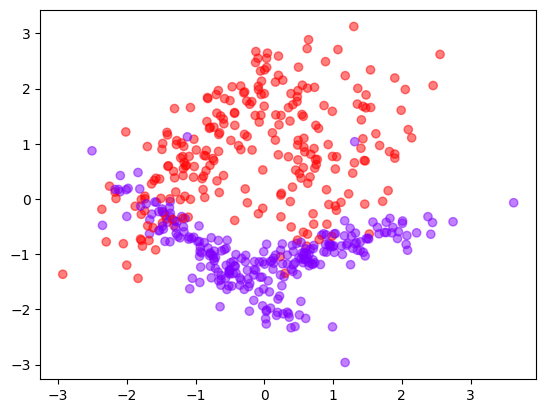

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap='rainbow')

## K-Nearest Neighbours avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Précision de l'Entraînement:", accuracy_score(y_train, clf.predict(X_train)))
print("Précision du Test:", accuracy_score(y_test, y_pred))

Précision de l'Entraînement: 0.9575
Précision du Test: 0.89


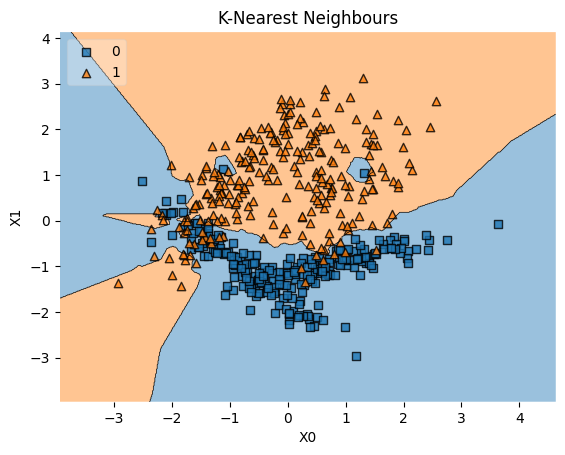

In [10]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('K-Nearest Neighbours')
plt.show()